<a href="https://colab.research.google.com/github/19PA1A0452/AI/blob/master/keerthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Import required modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
!wget https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv

--2020-03-03 05:01:53--  https://gist.github.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.github.com (gist.github.com)... 192.30.253.118
Connecting to gist.github.com (gist.github.com)|192.30.253.118|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv [following]
--2020-03-03 05:01:53--  https://gist.githubusercontent.com/tdchaitanya/d84c787328df169c50a06eb1669666c9/raw/7ffeddc80bec1c22e91bfed6e026620cf989eacf/housing_data.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2022817 (1.9M) [text/plain]


In [3]:
!ls

housing_data.csv  sample_data


In [0]:
# load the data from a csv file
data = pd.read_csv('housing_data.csv')

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#head is used to display first n entries of the data frame
data[["sqft_living","price"]].head(10)

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1225000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


In [0]:
# sklearn expects arrays as input for building the model
X = np.array(data['sqft_living'])
y = np.array(data['price'])

In [0]:
# we a need a test set to measure the performance of our model. 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Text(0, 0.5, 'price')

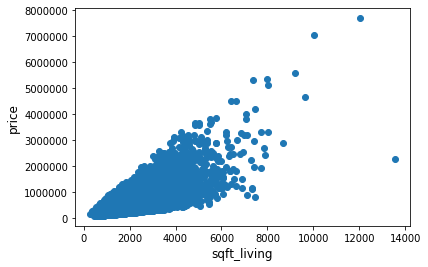

In [12]:
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

In [0]:
# X_train is a 1-d array, since skleanr expects 2-d array as input, we are changing the dimension.
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
regr.coef_

array([283.38900258])

In [16]:
regr.intercept_

-50349.03054891748

In [17]:
# training error
regr.score(X_train, y_train)

0.49242540369955873

In [18]:
# testing error
regr.score(X_test, y_test)

0.5005114458347968

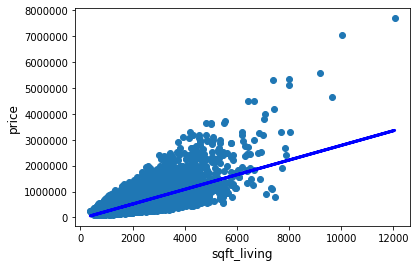

In [19]:
# Plot predictions on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.predict(X_train), color='blue',
         linewidth=3)

plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

plt.show()

In [20]:
regr.predict(np.array([[2000]]))


array([516428.97460283])

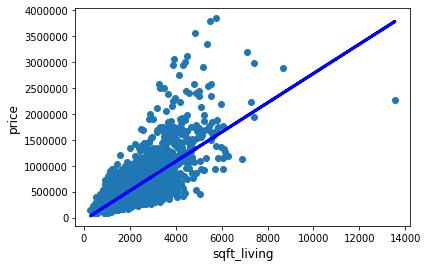

In [21]:
# Plot predictions on testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

plt.show()